In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set(style="darkgrid", palette="bright",font_scale=1.5)

In [3]:
df=pd.read_csv("./StudentsPerformance.csv")
df.head()
#lunch [standard = 표준/ free/reduced =무료급식 혹은 감면 정도(가정형편)]
# test preparation course 시험 이수 정도 했는지, 안했는지.
# 수학, 읽기, 쓰기 점수를 성별, 인종, 부모학력, 급식 형편 수준에 따라 알아보기

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
df.corr()

,math score,reading score,writing score,average score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average score,0.918746,0.970331,0.965667,1.000000


In [27]:
from wordcloud import WordCloud

plt.subplots(figsize=(8,8))
wordcloud=WordCloud(
background_color='white',
width=512,
height=384).generate(' '.join(df))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

<AxesSubplot:>

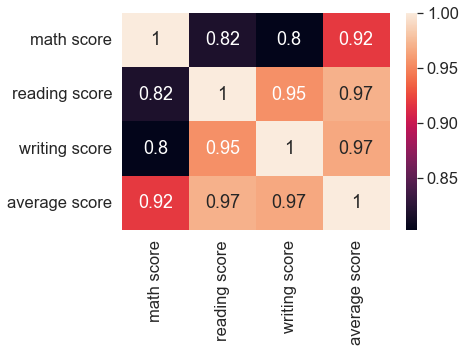

In [32]:
sns.heatmap(df.corr(),
           annot = True # 실제 값을 표시한다
           )

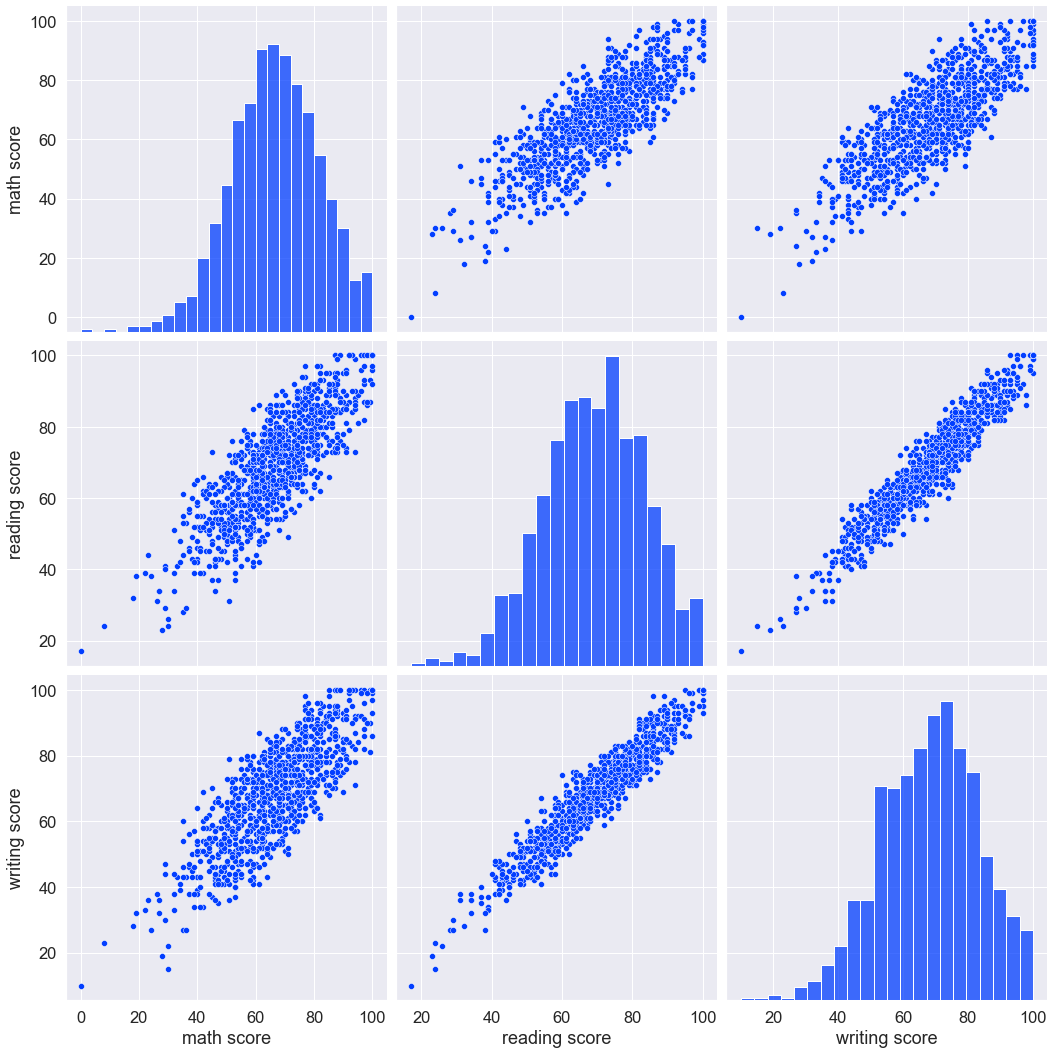

In [35]:
# pairplot은 상관관계를 알아볼 수 있는 표. 
#아래 표가 넓을 수록 상관관계가 낮고 좁고 날카로울수록 관계성이 있다는 뜻.
sns.pairplot(df[['math score','reading score', 'writing score']], height=5)

#결과 , 읽기 점수와 쓰기 점수가 상관관계가 유의미하다. 

In [6]:
#세 과목의 점수의 평균을 구한 뒤 데이터프레임에 저장

def average_score(dt):
    return(dt['math score']+dt['reading score']+dt['writing score'])/3

df['average score']=df.apply(average_score, axis=1)

In [15]:
df.head(10)
#bachelor's degree = 4년재 학사학위
#master's degree = 석사이상
#some college = 전문
#associate's degree = 준 학사학위 
#high school = 고등학교
#some high school = 고교

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


Text(0.5, 1.0, 'writing')

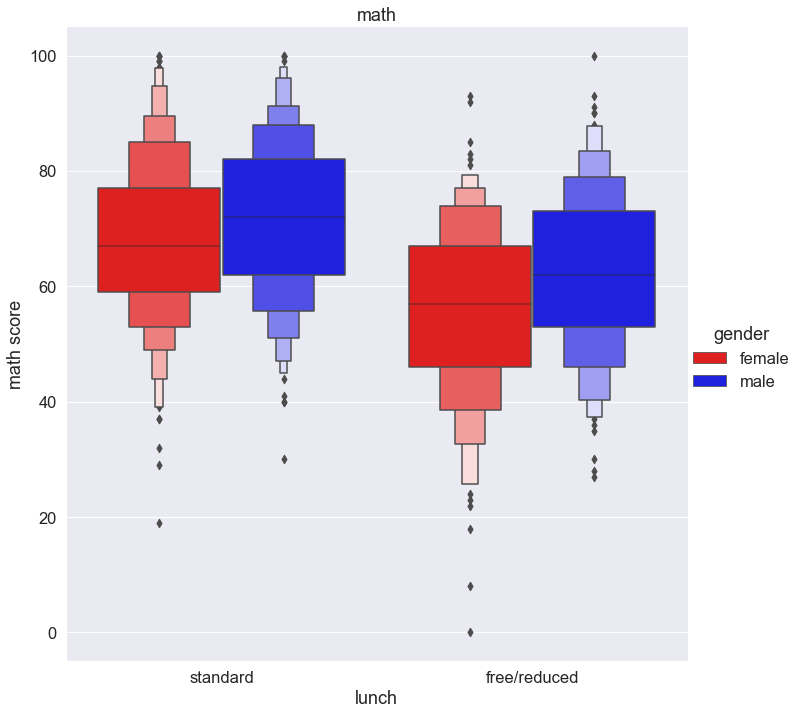

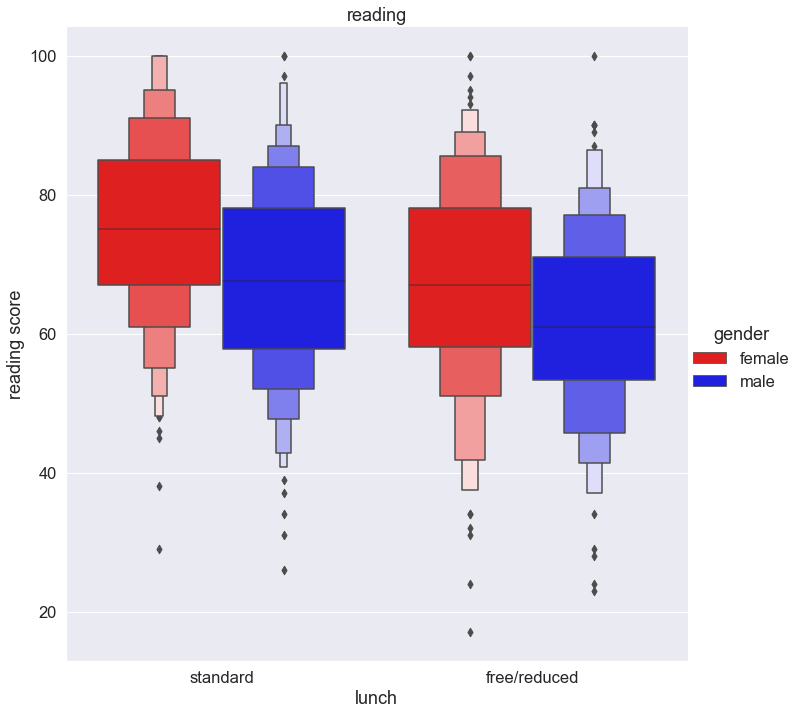

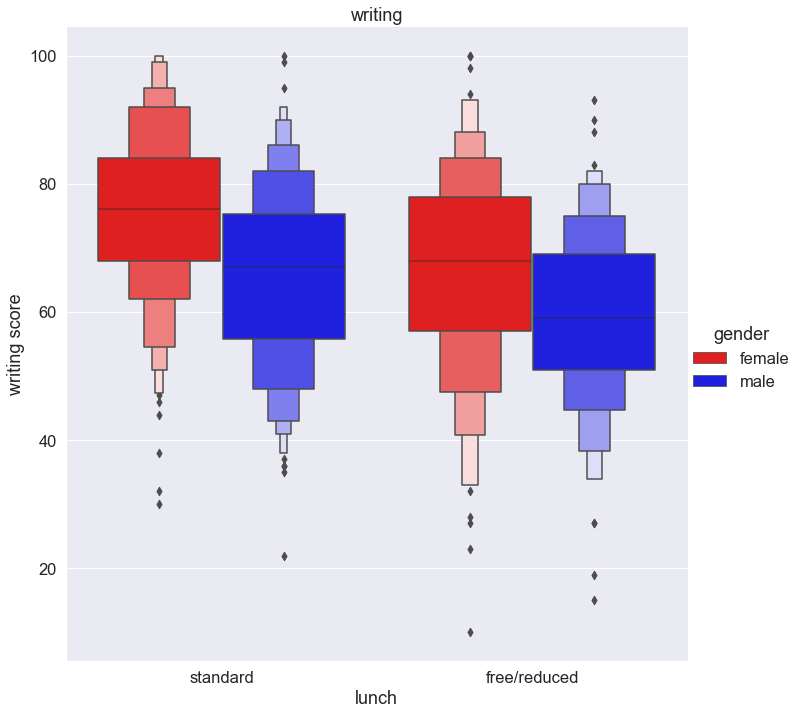

In [10]:
sns.catplot(x='lunch', y='math score', hue='gender', kind='boxen', data=df, height=10,
           palette=sns.color_palette(['red','blue']))
plt.title('math')

sns.catplot(x='lunch', y='reading score', hue='gender', kind='boxen', data=df, height=10,
           palette=sns.color_palette(['red','blue']))
plt.title('reading')
sns.catplot(x='lunch', y='writing score', hue='gender', kind='boxen', data=df, height=10,
           palette=sns.color_palette(['red','blue']))
plt.title('writing')
#남학생이 여학생보다 수학점수가 높은편이고 여학생이 남학생보다 읽기,쓰기 점수가 높았다.
# 

Text(0.5, 1.0, 'average')

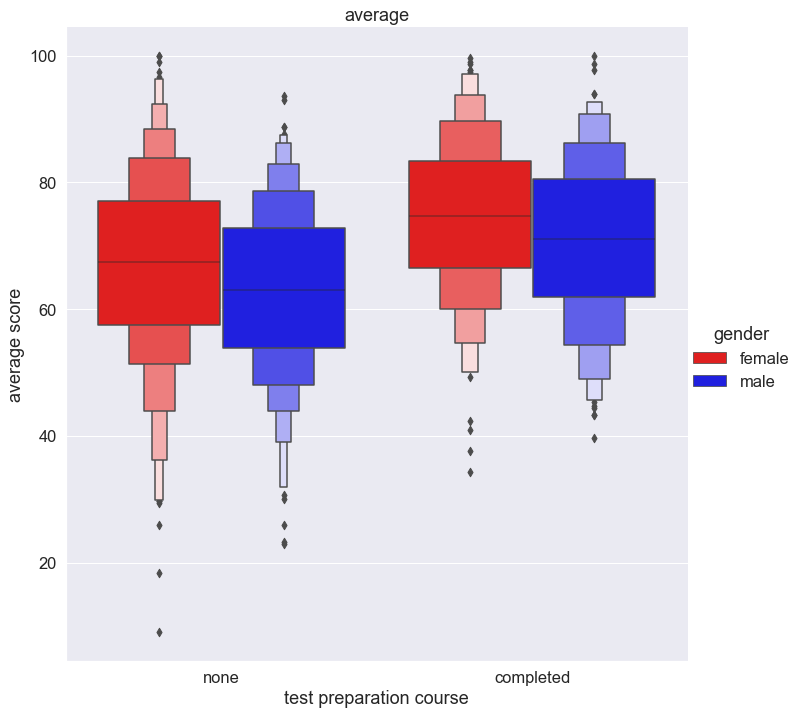

In [12]:
sns.catplot(x='test preparation course', y='average score', hue='gender', kind='boxen', data=df, height=10,
           palette=sns.color_palette(['red','blue']))
plt.title('average')
# 시험 이수를 준비한 학생들의 평균이 더 높았다.

No handles with labels found to put in legend.


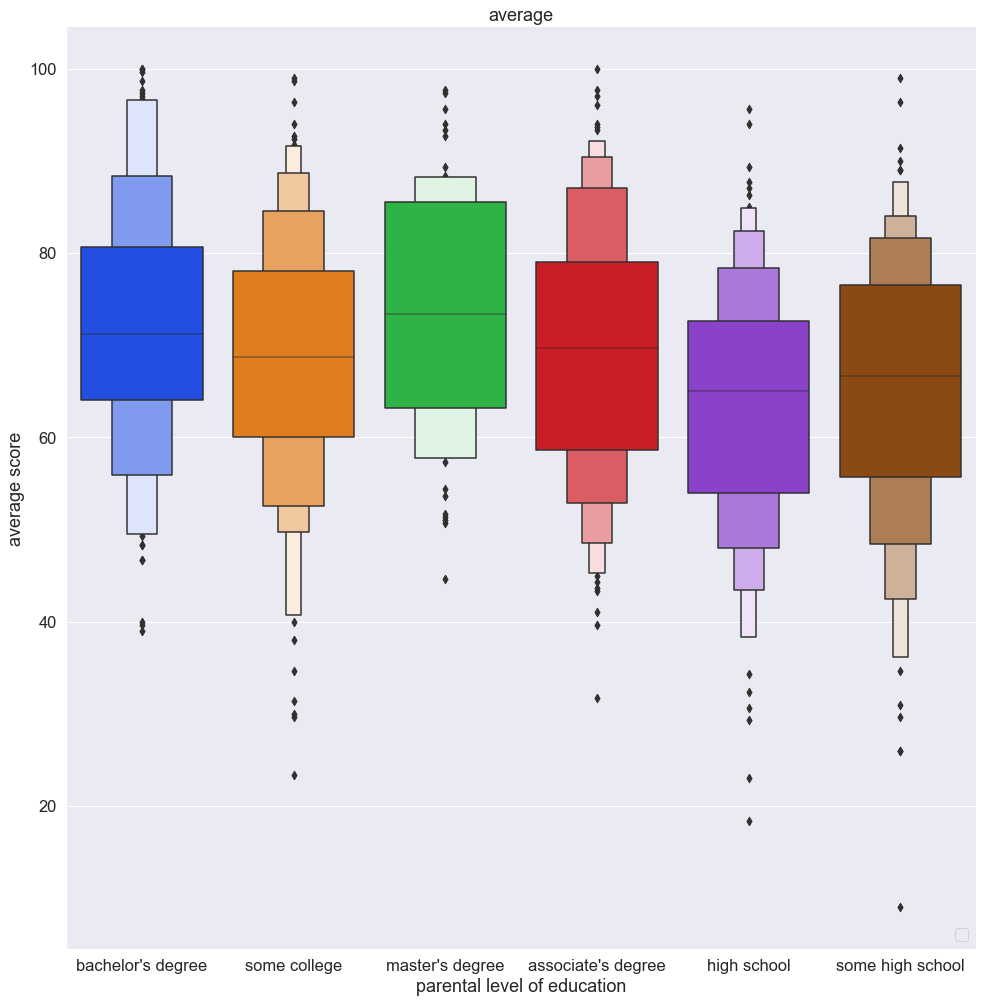

In [14]:
sns.catplot(x='parental level of education', y='average score', kind='boxen', data=df, height=14)
plt.title('average')
plt.legend(loc='lower right')

# 그렇게 큰 차이는 없다. 

In [23]:
student_data = df.drop(['math score', 'reading score', 'writing score'], axis = 1, inplace = False)
student_label = df[['math score', 'reading score', 'writing score']].mean(axis = 1)
student_label.column = ['score']

In [25]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(student_data, student_label, test_size=0.2, random_state=10)
#학습데이터 세트로 학습 수행
df_clf = DecisionTreeClassifier(random_state =10)
df_clf.fit(X_train, y_train)

pred = df_clf.predict(X_test)
pred
from sklearn.metrics import accuracy_score
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

ValueError: could not convert string to float: 'male'